In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# data from https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html
total_data = pd.read_csv('covid19-download.csv')

total_data.head()

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,35,Ontario,Ontario,2020-01-31,NaN,3,0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59,British Columbia,Colombie-Britannique,2020-01-31,NaN,1,0,0.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Canada,Canada,2020-01-31,NaN,4,0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35,Ontario,Ontario,2020-02-08,NaN,3,0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59,British Columbia,Colombie-Britannique,2020-02-08,NaN,4,0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# extracting data from Ontario
ontario_filter = total_data['prname'] == 'Ontario'
ontario_data1 = total_data.loc[ontario_filter, :]

# extracting confirmed cases and dates
ontario_confirmed_cases = ontario_data1['numtotal'].values
dates1 = ontario_data1['date'].values

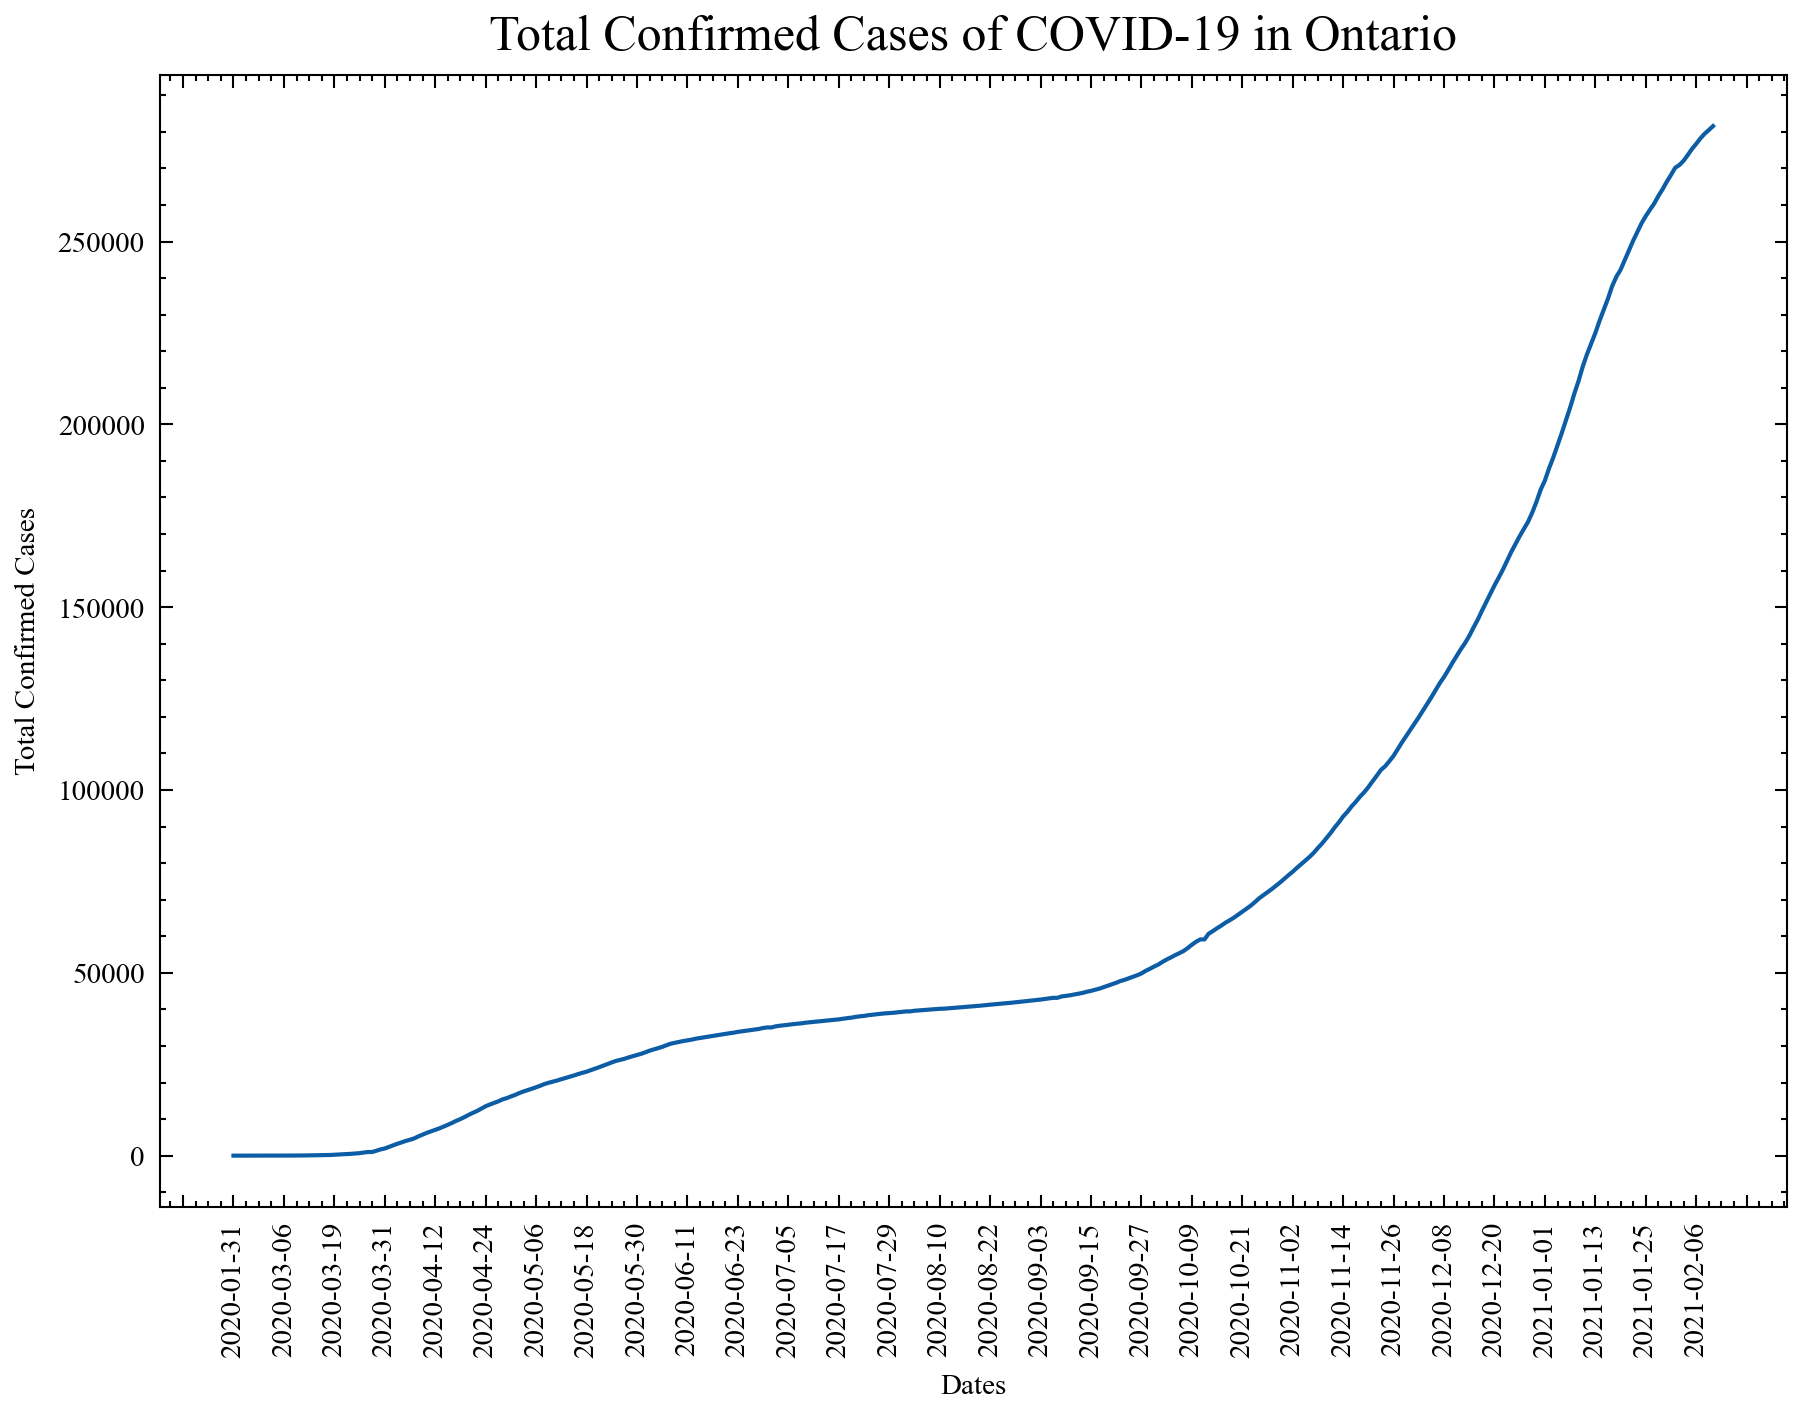

In [4]:
# plotting confirmed cases over time
plt.style.use(['science', 'no-latex'])
fig, ax = plt.subplots(dpi=300, figsize=(7,5))

ax.plot(dates1, ontario_confirmed_cases)

ax.set_xlabel('Dates', fontsize = 7)
ax.set_ylabel('Total Confirmed Cases', fontsize = 7)
ax.set_title('Total Confirmed Cases of COVID-19 in Ontario')

ax.tick_params(axis = 'x', labelsize = 7)
ax.tick_params(axis = 'y', labelsize = 7)

plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(plt.MultipleLocator(12)) 

plt.show()

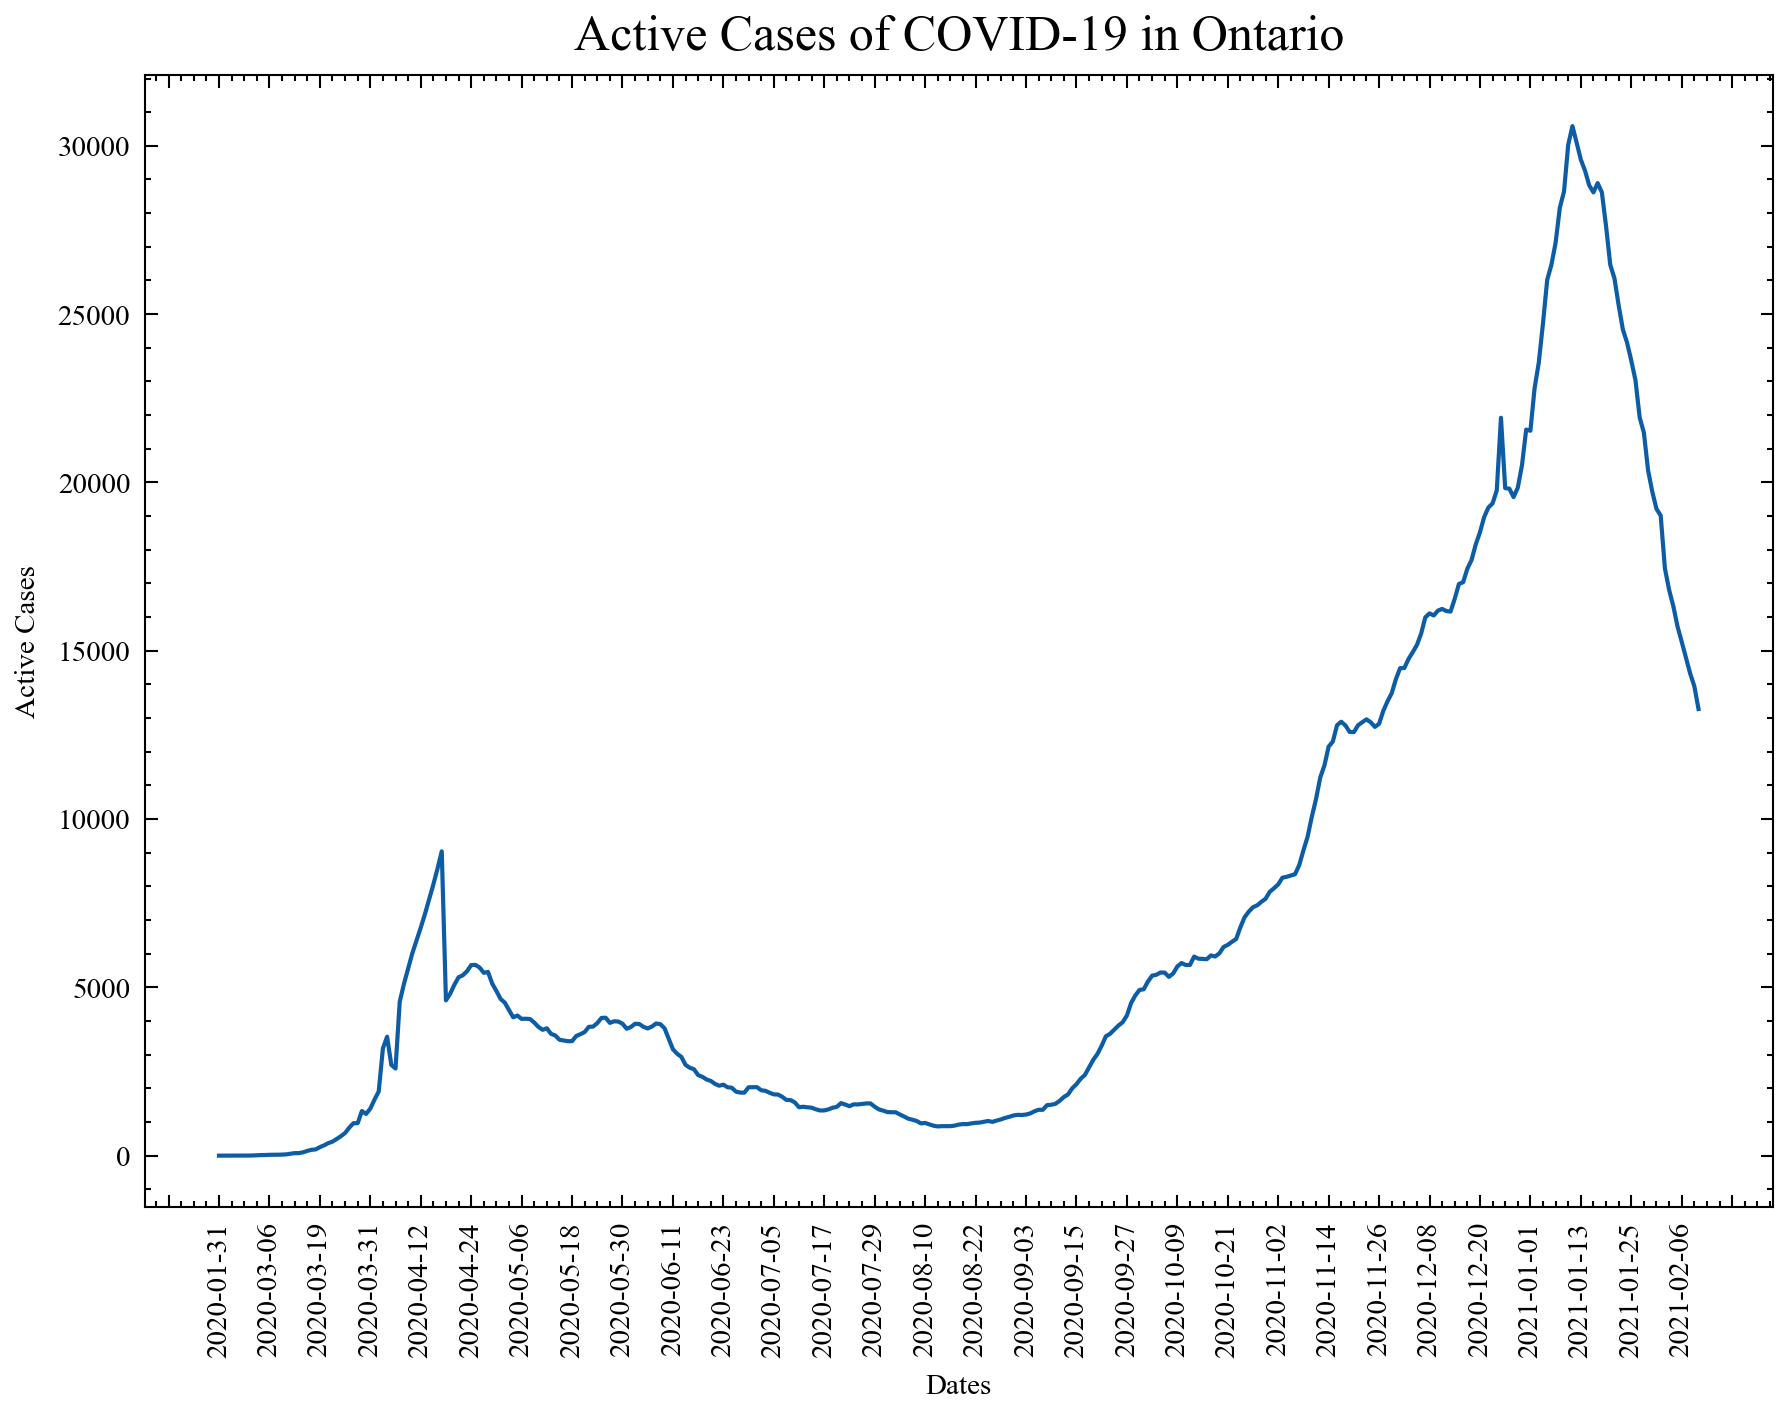

In [5]:
# plotting active cases in Ontario
ontario_active = ontario_data1['numactive'].values

fig, ax = plt.subplots(dpi=300, figsize=(7,5))

ax.plot(dates1, ontario_active)

ax.set_xlabel('Dates', fontsize = 7)
ax.set_ylabel('Active Cases', fontsize = 7)
ax.set_title('Active Cases of COVID-19 in Ontario')

ax.tick_params(axis = 'x', labelsize = 7)
ax.tick_params(axis = 'y', labelsize = 7)

plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MultipleLocator(12)) 

plt.show()

In [6]:
# extracting number of hospitalized, ICU, ventilated
# data from: https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario
ontario_data2 = pd.read_csv('covidtesting.csv')
dates2 = ontario_data2['Reported Date'].values

patients_hospitalized = ontario_data2['Number of patients hospitalized with COVID-19'].values
patients_icu = ontario_data2['Number of patients in ICU with COVID-19'].values
patients_icu_vent = ontario_data2['Number of patients in ICU on a ventilator with COVID-19'].values

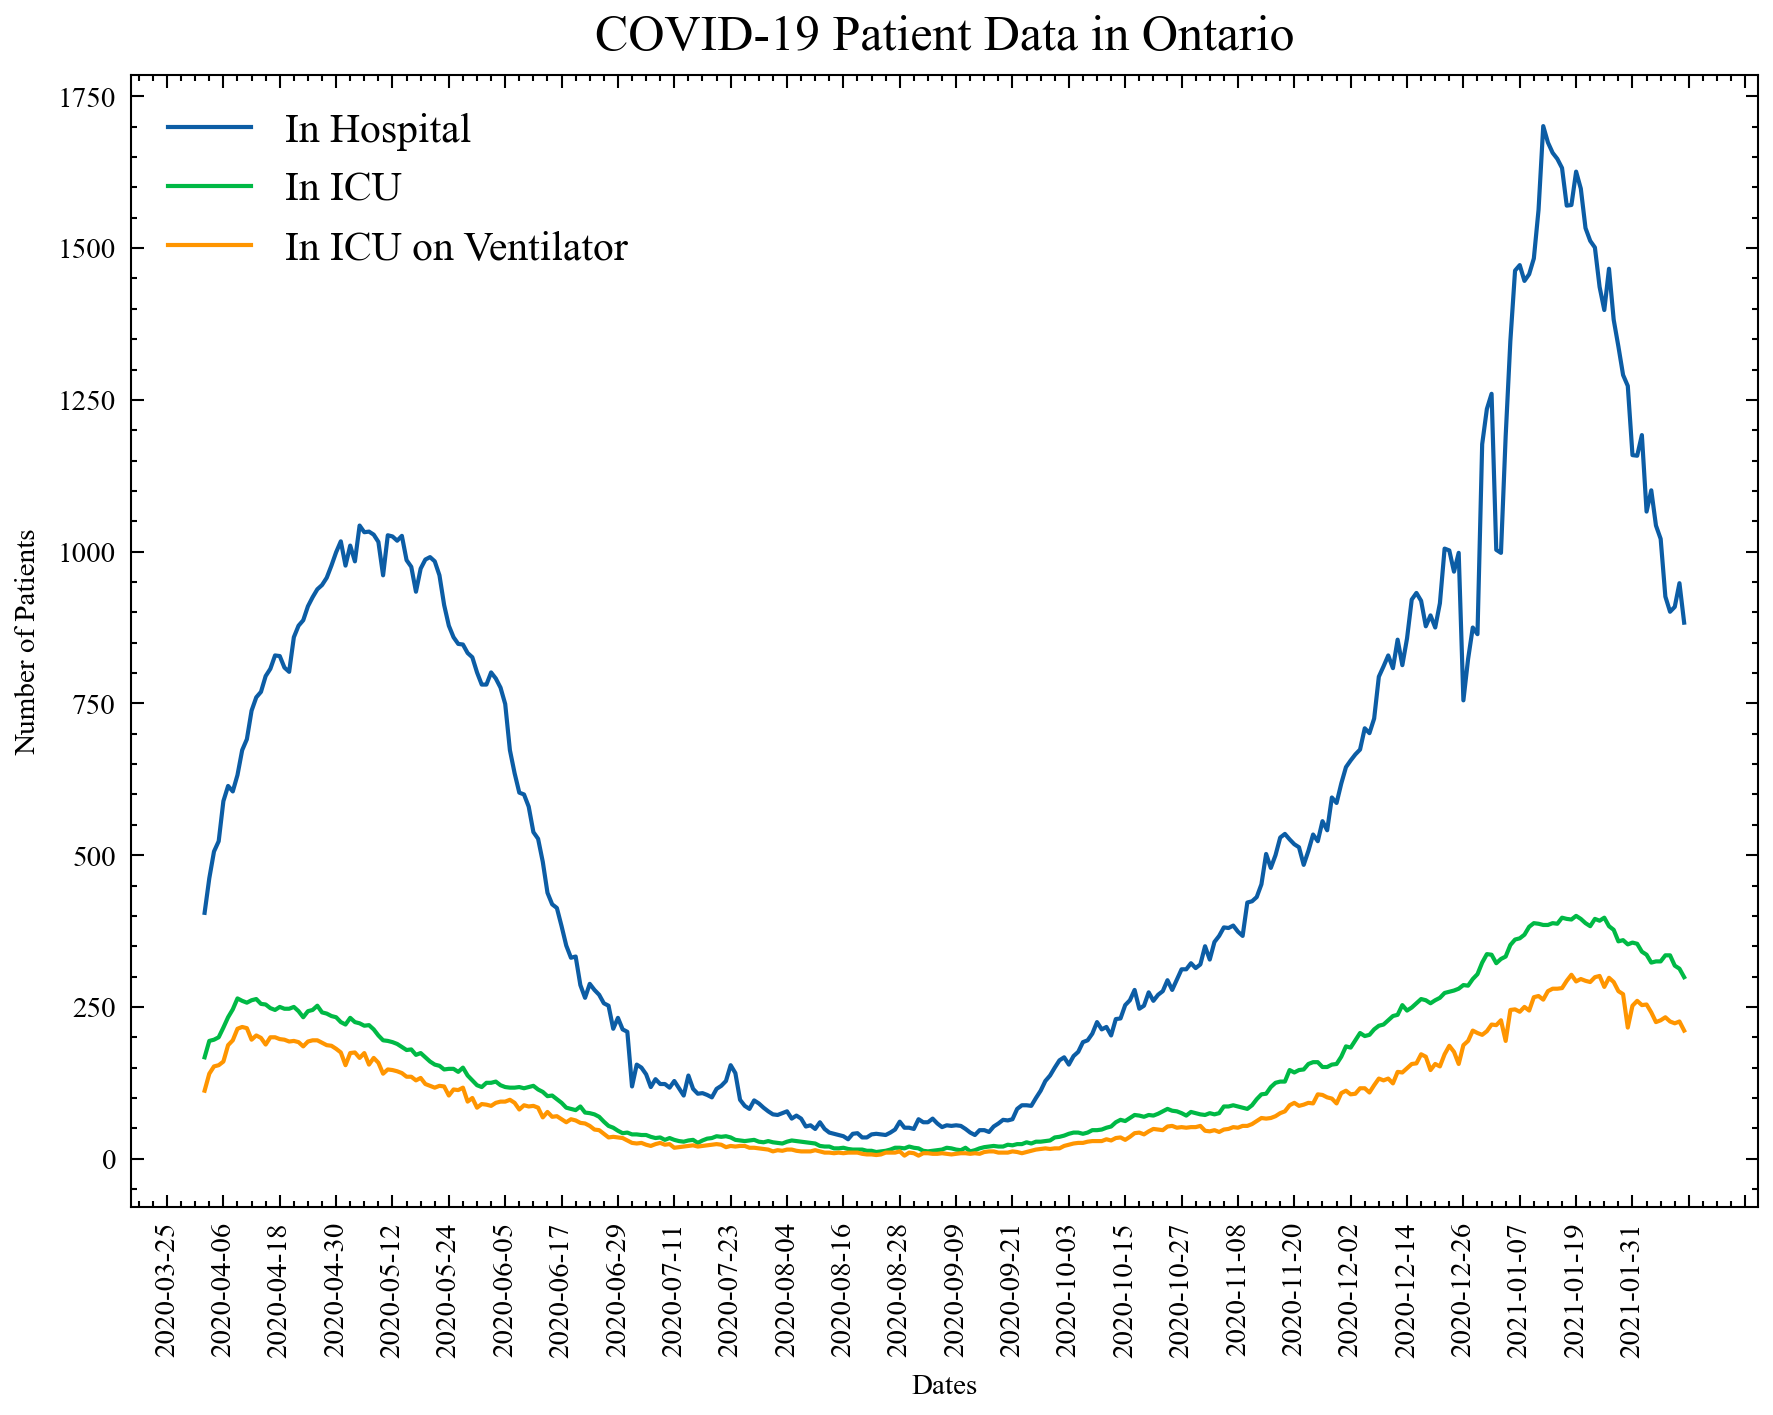

In [7]:
# plotting number of hospitalized, ICU, ventilated
fig, ax = plt.subplots(dpi=300, figsize=(7,5))

ax.plot(dates2, patients_hospitalized, label='In Hospital')
ax.plot(dates2, patients_icu, label='In ICU')
ax.plot(dates2, patients_icu_vent, label='In ICU on Ventilator')

ax.set_xlabel('Dates', fontsize = 7)
ax.set_ylabel('Number of Patients', fontsize = 7)
ax.set_title('COVID-19 Patient Data in Ontario')

ax.tick_params(axis = 'x', labelsize = 7)
ax.tick_params(axis = 'y', labelsize = 7)

plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MultipleLocator(12)) 

plt.legend()
plt.show()

In [8]:
# extracting confirmed cases in all of Canada
canada_filter = total_data['prname'] == 'Canada'
canada_data = total_data.loc[canada_filter, :]

canada_confirmed_cases = canada_data['numtotal'].values

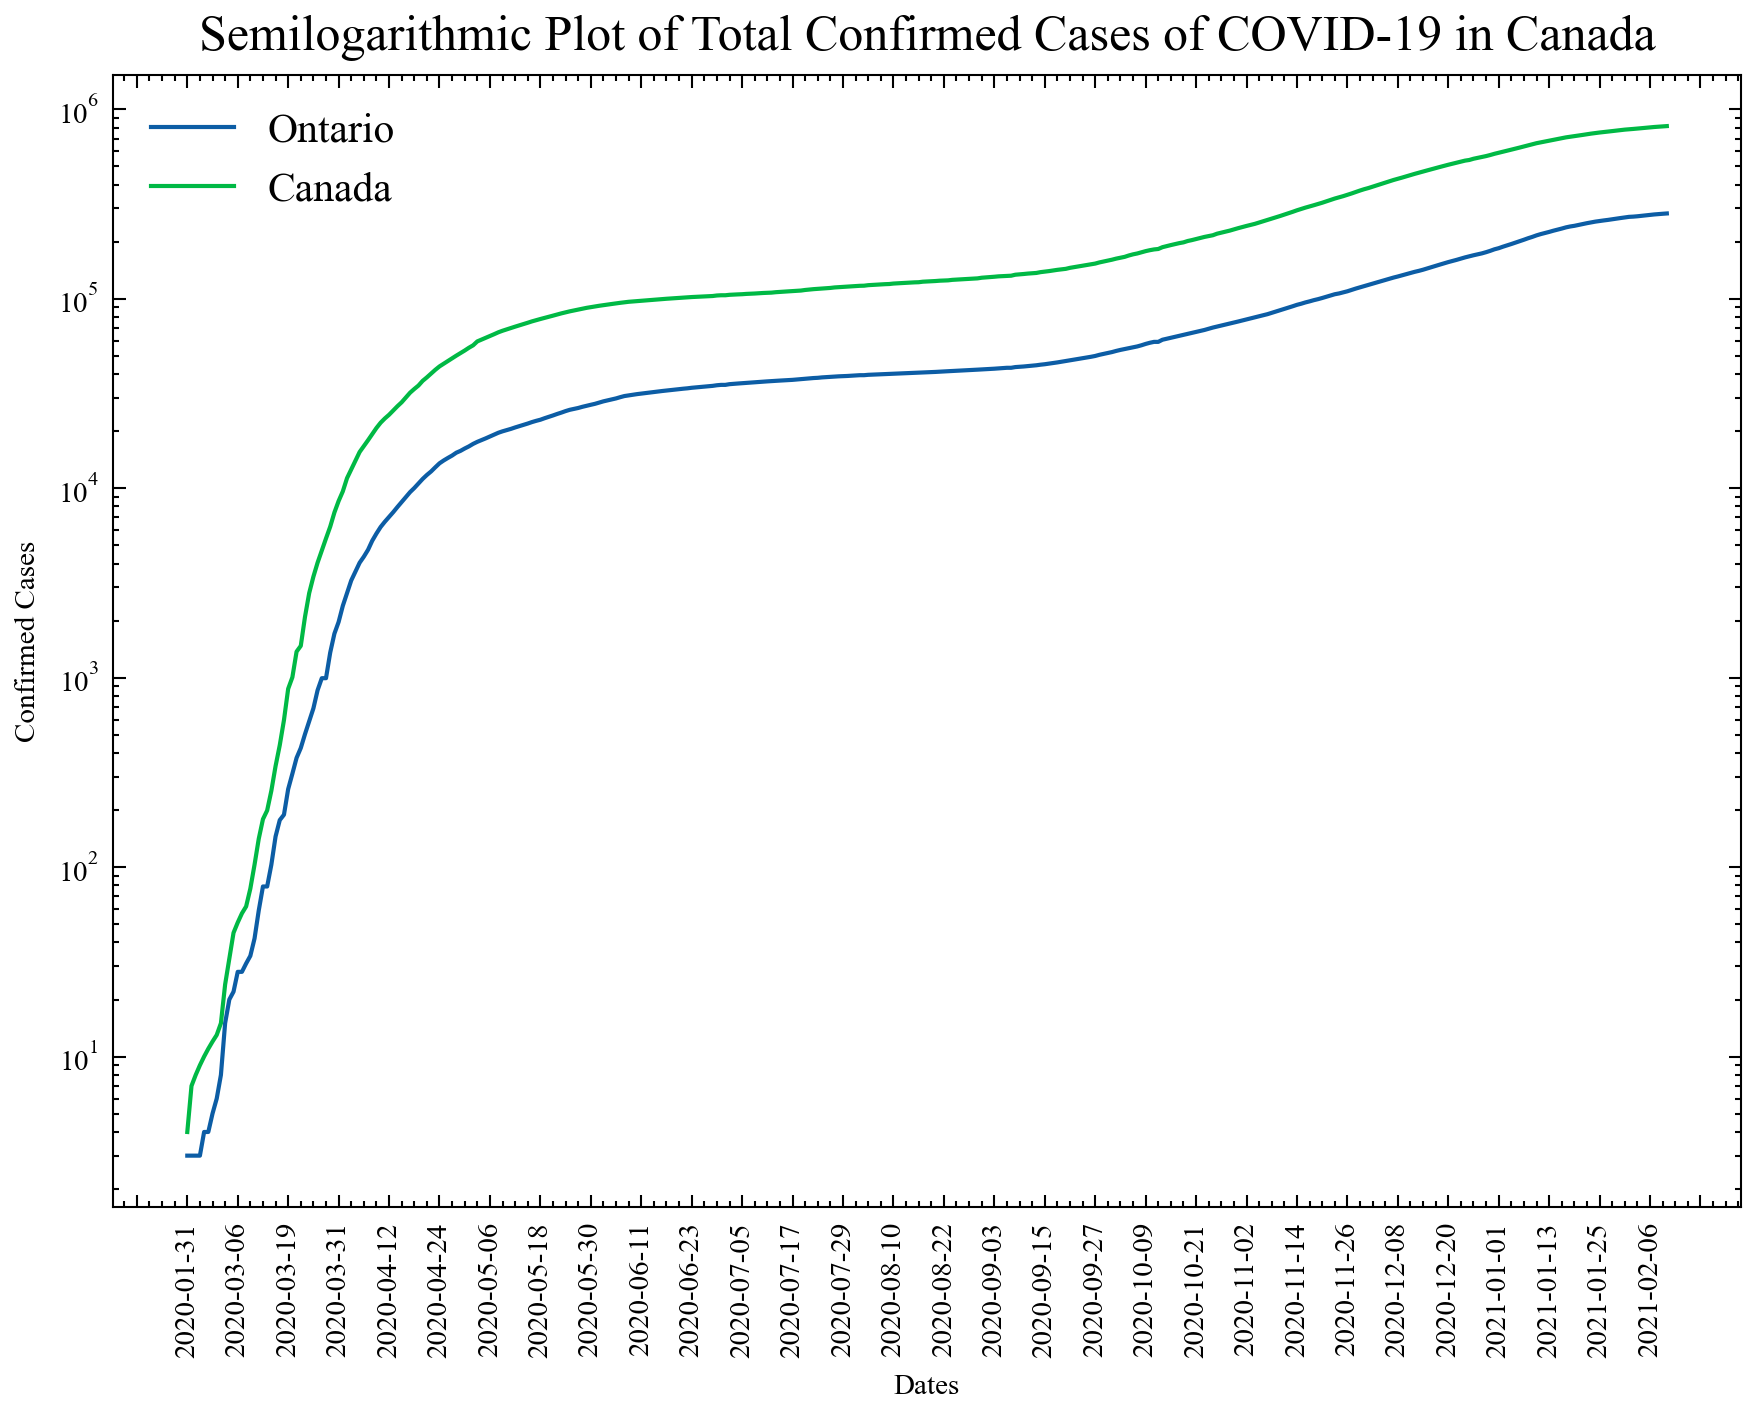

In [9]:
# semilog plot comparing cases in Ontario to Canda
fig, ax = plt.subplots(dpi=300, figsize=(7,5))

ax.semilogy(dates1, ontario_confirmed_cases, label='Ontario')
ax.semilogy(dates1, canada_confirmed_cases, label='Canada')

ax.set_xlabel('Dates', fontsize = 7)
ax.set_ylabel('Confirmed Cases', fontsize = 7)
ax.set_title('Semilogarithmic Plot of Total Confirmed Cases of COVID-19 in Canada')

ax.tick_params(axis = 'x', labelsize = 7)
ax.tick_params(axis = 'y', labelsize = 7)

plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MultipleLocator(12)) 

plt.legend(loc=2)
plt.show()

In [10]:
# extracting and comparing total deaths between provinces
canada_deaths = canada_data['numdeaths'].values
ontario_deaths = ontario_data1['numdeaths'].values

quebec_filter = total_data['prname'] == 'Quebec'
quebec_data = total_data.loc[quebec_filter, :]
quebec_deaths = quebec_data['numdeaths'].values

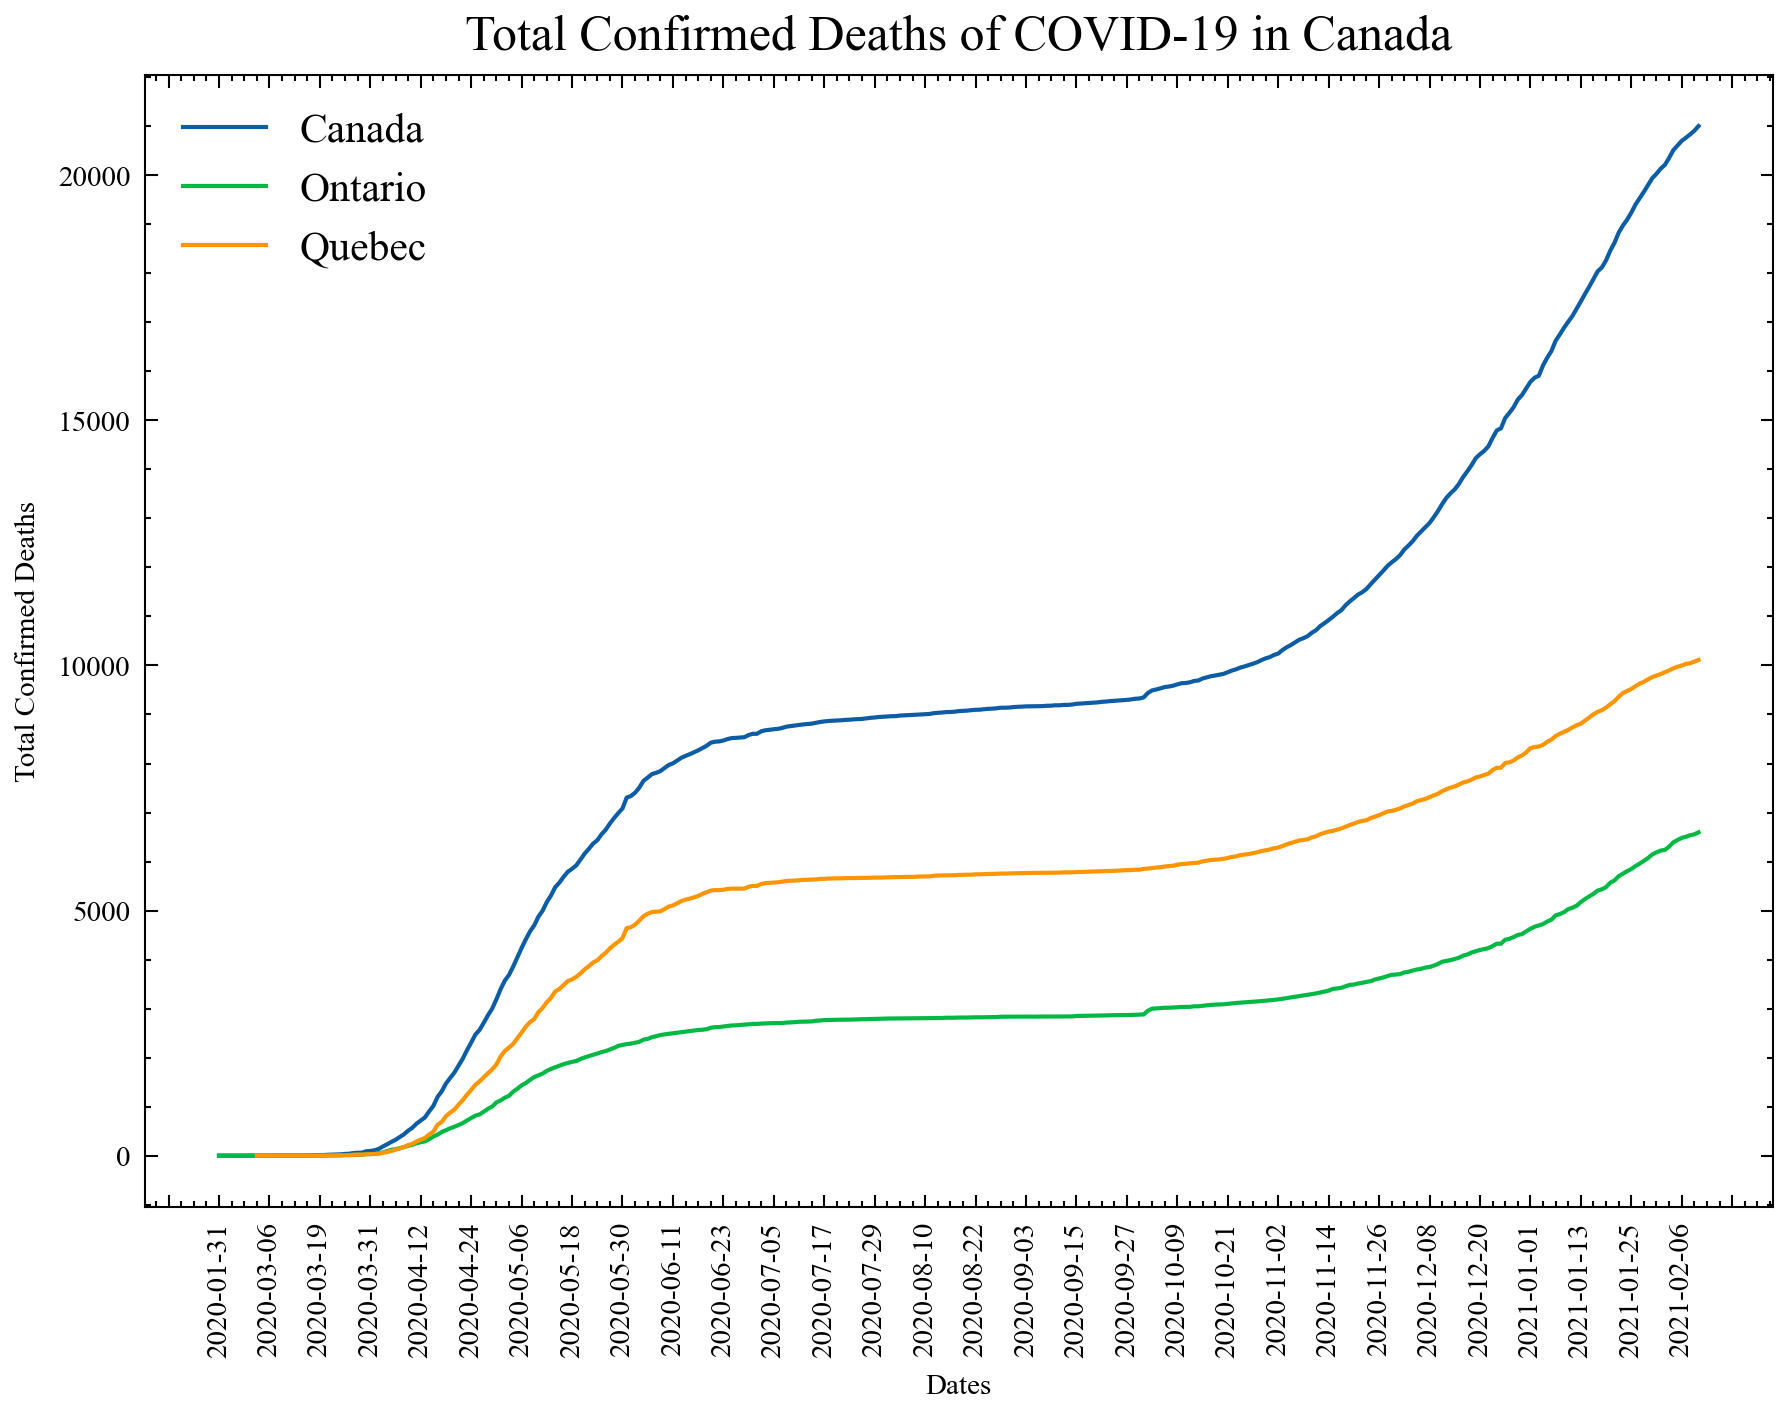

In [11]:
# plotting confirmed deaths over time
plt.style.use(['science', 'no-latex'])
fig, ax = plt.subplots(dpi=300, figsize=(7,5))

ax.plot(dates1, canada_deaths, label='Canada')
ax.plot(dates1, ontario_deaths, label='Ontario')
ax.plot(dates1[9:], quebec_deaths, label='Quebec')

ax.set_xlabel('Dates', fontsize = 7)
ax.set_ylabel('Total Confirmed Deaths', fontsize = 7)
ax.set_title('Total Confirmed Deaths of COVID-19 in Canada')

ax.tick_params(axis = 'x', labelsize = 7)
ax.tick_params(axis = 'y', labelsize = 7)

plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(plt.MultipleLocator(12)) 

plt.legend()
plt.show()